In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [63]:
df0=pd.read_csv('train.csv')
dfx=pd.read_csv('test.csv')
print(len(df0))
df=pd.concat([df0,dfx],axis=0)
df.head()

550068


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [64]:
df0=df
df.User_ID=le.fit_transform(df.User_ID)
df.Product_ID=le.fit_transform(df.Product_ID)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,684,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,2406,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,868,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,844,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,2769,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [65]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [66]:
df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [67]:
len(df.Gender.unique())

2

In [68]:
df.Gender=df.Gender.apply(lambda x: 1 if x=='M'   else 0)

In [69]:
df.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [70]:
df.Age=df.Age.apply(lambda x: (int(x.split('-')[0])+int(x.split('-')[1]))/2 if len(x.split('-'))==2   else x)
df.Age=df.Age.apply(lambda x: 60 if x=='55+'   else x)


In [71]:
df.City_Category=df.City_Category.apply(lambda x: 1 if x=='A'   else x)
df.City_Category=df.City_Category.apply(lambda x: 2 if x=='B'   else x)
df.City_Category=df.City_Category.apply(lambda x: 3 if x=='C'   else x)

In [72]:
df.City_Category.value_counts()

2    329739
3    243684
1    210244
Name: City_Category, dtype: int64

In [73]:
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.apply(lambda x: 4 if x=='4+'   else x)

In [74]:
df.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [75]:
df=df.fillna(1)

In [76]:
x=np.array(df.User_ID.value_counts()>500)
np.sum(x)

222

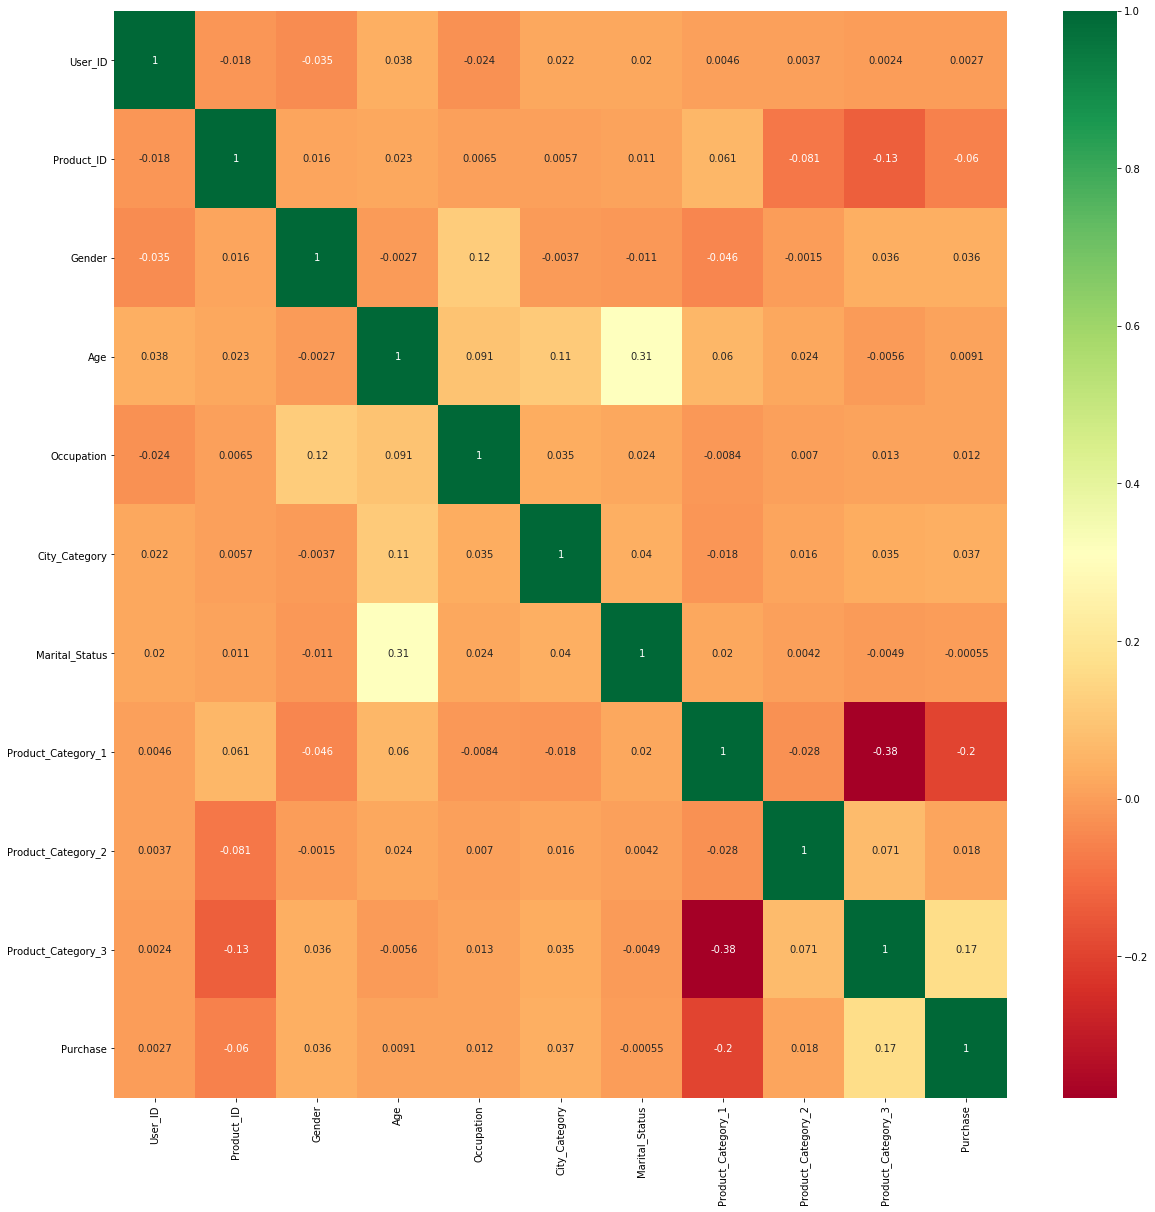

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [77]:
X1=df[['Product_Category_1','Product_Category_3','Product_ID','Gender','City_Category']]

In [78]:
 from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly = PolynomialFeatures(interaction_only=True,degree=2)
X1=poly.fit_transform(X1)
X1 = pd.DataFrame(X1)

In [80]:
scaler=StandardScaler()
X1[1]=scaler.fit_transform(X1[[1]])
X1[2]=scaler.fit_transform(X1[[2]])
X1[3]=scaler.fit_transform(X1[[3]])
X1[4]=scaler.fit_transform(X1[[4]])
X1[5]=scaler.fit_transform(X1[[5]])
X1[6]=scaler.fit_transform(X1[[6]])
X1[7]=scaler.fit_transform(X1[[7]])
X1[8]=scaler.fit_transform(X1[[8]])
X1[9]=scaler.fit_transform(X1[[9]])
X1[10]=scaler.fit_transform(X1[[10]])
X1[11]=scaler.fit_transform(X1[[11]])
X1[12]=scaler.fit_transform(X1[[12]])
X1[13]=scaler.fit_transform(X1[[13]])
X1[14]=scaler.fit_transform(X1[[14]])
X1[15]=scaler.fit_transform(X1[[15]])

X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-0.610134,-0.607847,-1.020547,-1.745599,-1.372156,-0.469052,-0.719176,-0.963792,-0.838956,-0.569081,-0.637881,-0.628296,-1.128042,-1.097105,-1.396448
1,1.0,-1.125843,1.623321,0.664537,-1.745599,-1.372156,-0.065850,-0.685040,-0.963792,-1.051141,2.381962,-0.637881,0.340159,-1.128042,-0.433741,-1.396448
2,1.0,1.710556,-0.607847,-0.840491,-1.745599,-1.372156,-0.139159,0.087368,-0.963792,0.115877,-0.552627,-0.637881,-0.628296,-1.128042,-1.026223,-1.396448
3,1.0,1.710556,-0.607847,-0.863977,-1.745599,-1.372156,-0.139159,0.059596,-0.963792,0.115877,-0.554773,-0.637881,-0.628296,-1.128042,-1.035469,-1.396448
4,1.0,0.679138,-0.607847,1.019755,0.572869,1.259845,-0.285778,1.219075,0.981803,1.388988,-0.382629,-0.456159,-0.479303,1.261445,1.839493,1.329700


In [81]:
#X1['Product_Category_1']=scaler.fit_transform(X1[['Product_Category_1']])
#X1['Product_Category_3']=scaler.fit_transform(X1[['Product_Category_3']])
#X1['Product_ID']=scaler.fit_transform(X1[['Product_ID']])
#X1[4]=scaler.fit_transform(X1[[4]])
#X1[5]=scaler.fit_transform(X1[[5]])
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-0.610134,-0.607847,-1.020547,-1.745599,-1.372156,-0.469052,-0.719176,-0.963792,-0.838956,-0.569081,-0.637881,-0.628296,-1.128042,-1.097105,-1.396448
1,1.0,-1.125843,1.623321,0.664537,-1.745599,-1.372156,-0.065850,-0.685040,-0.963792,-1.051141,2.381962,-0.637881,0.340159,-1.128042,-0.433741,-1.396448
2,1.0,1.710556,-0.607847,-0.840491,-1.745599,-1.372156,-0.139159,0.087368,-0.963792,0.115877,-0.552627,-0.637881,-0.628296,-1.128042,-1.026223,-1.396448
3,1.0,1.710556,-0.607847,-0.863977,-1.745599,-1.372156,-0.139159,0.059596,-0.963792,0.115877,-0.554773,-0.637881,-0.628296,-1.128042,-1.035469,-1.396448
4,1.0,0.679138,-0.607847,1.019755,0.572869,1.259845,-0.285778,1.219075,0.981803,1.388988,-0.382629,-0.456159,-0.479303,1.261445,1.839493,1.329700


In [85]:
y=df.Purchase[:550068]
X2=X1[:550068]



In [25]:
xtr, xte, ytr, yte=tts(X2,y,test_size=0.90)

In [26]:
from sklearn import model_selection ,metrics

In [207]:
alg4 =Ridge()
cv_score=model_selection.cross_val_score(alg4,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

4643.680206097807

In [97]:
alg4 = LinearRegression()
cv_score=model_selection.cross_val_score(alg4,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

4586.289295335797

In [32]:
alg4 = SVR()
cv_score=model_selection.cross_val_score(alg4,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

5216.591119598481

In [62]:
alg3 = RandomForestRegressor(n_estimators=60)
cv_score=model_selection.cross_val_score(alg3,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

3160.560452163378

In [28]:
alg4 = DecisionTreeRegressor(max_depth=28, min_samples_leaf=20,min_samples_split=15)
cv_score=model_selection.cross_val_score(alg4,X2,y,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

2687.8278798702695

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
alg2 =GradientBoostingRegressor()
cv_score=model_selection.cross_val_score(alg2,xtr,ytr,cv=20,scoring='neg_mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
np.mean(cv_score)

2982.3644476364925

In [29]:
alg4.fit(X2,y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=28,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
alg2.fit(xtr,ytr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
ans4=alg4.predict(X1[550068:])

In [31]:
xx=pd.read_csv('submission.csv')
xx.head()

,Purchase,User_ID,Product_ID
0,15781.118590,1000004,P00128942
1,11746.665354,1000009,P00113442
2,5731.338028,1000010,P00288442
3,2057.468750,1000010,P00145342
4,2585.590829,1000011,P00053842


In [32]:
xx['Purchase']=ans4
xx.head()

,Purchase,User_ID,Product_ID
0,15943.738411,1000004,P00128942
1,11438.242424,1000009,P00113442
2,5189.478261,1000010,P00288442
3,2191.350000,1000010,P00145342
4,2325.240741,1000011,P00053842


In [33]:
xx.to_csv('submission.csv',index=False)